In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
import numpy as np

In [102]:
df=pd.read_csv('diabetes.csv')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


## Data Cleaning and Preparation

In [107]:
df=df.drop(['No_Pation'],axis=1)

In [109]:
df.head()

,ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [125]:
df['Gender']=df['Gender'].replace('f','F')

### Male = 0 and Female = 1

In [133]:
df['Gender']=df['Gender'].replace({'M':0,'F':1})


In [140]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [142]:
df['CLASS']=df['CLASS'].replace({'N ':'N', 'Y ':'Y'})

In [144]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [146]:
df = df.drop(df[df['CLASS'] == 'P'].index)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 0 to 999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      947 non-null    int64  
 1   Gender  947 non-null    int64  
 2   AGE     947 non-null    int64  
 3   Urea    947 non-null    float64
 4   Cr      947 non-null    int64  
 5   HbA1c   947 non-null    float64
 6   Chol    947 non-null    float64
 7   TG      947 non-null    float64
 8   HDL     947 non-null    float64
 9   LDL     947 non-null    float64
 10  VLDL    947 non-null    float64
 11  BMI     947 non-null    float64
 12  CLASS   947 non-null    object 
dtypes: float64(8), int64(4), object(1)
memory usage: 103.6+ KB


### NO Diabetes found = 0 and Diabetes found = 1

In [150]:
df['CLASS']=df['CLASS'].replace({'N':0, 'Y':1})

In [152]:
df['CLASS'].unique()

array([0, 1])

## Data Analysis

(array([103.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 844.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

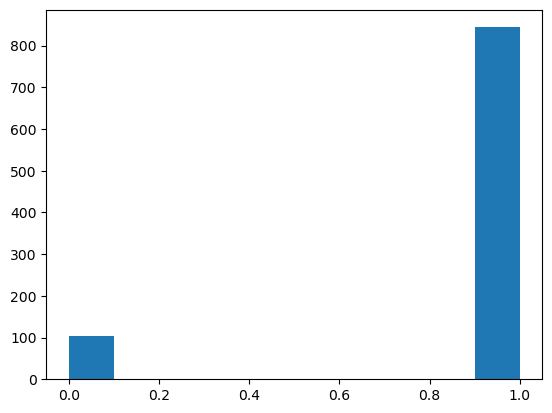

In [155]:
plt.hist(df['CLASS'])

In [162]:

#df['Outcome'].count().where(df['Outcome']==1)
negative=(df['CLASS']==0).sum()
positive=(df['CLASS']==1).sum()

In [164]:
result=[positive,negative]

([<matplotlib.patches.Wedge at 0x11ced2e90>,
 [Text(-1.0364072813469336, 0.36859184360354214, 'Positive'),
  Text(1.0364072727194185, -0.3685918678624056, 'Negative')],
 [Text(-0.5653130625528728, 0.20105009651102299, '89.1%'),
  Text(0.5653130578469554, -0.2010501097431303, '10.9%')])

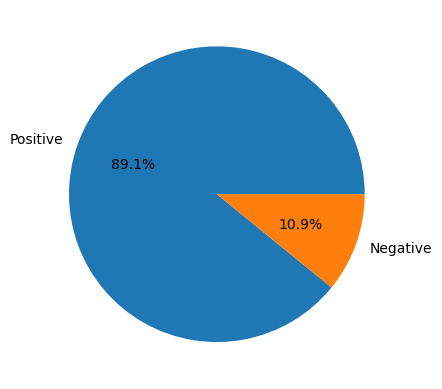

In [166]:
fig, ax = plt.subplots()
ax.pie(result, labels=labels,autopct='%1.1f%%')

In [168]:
from matplotlib.patches import ConnectionPatch

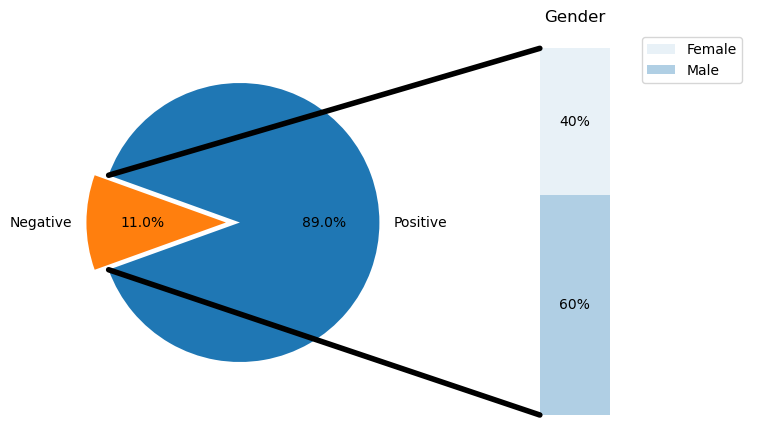

In [212]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.89, .11]
labels = ['Positive','Negative']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.60, .40]
age_labels = ['Male','Female']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Gender')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

## Statistical Analysis

In [240]:
corr = df.corr(method = 'pearson')
corr


,ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,-0.014259,-0.056477,-0.089963,-0.098124,0.003976,0.047259,-0.042520,0.028503,-0.066276,0.158053,0.076764,-0.045145
Gender,-0.014259,1.000000,-0.032136,-0.116071,-0.151766,-0.003129,0.060116,-0.050080,0.130380,-0.063521,-0.202722,-0.095024,-0.126611
AGE,-0.056477,-0.032136,1.000000,0.104074,0.063636,0.348311,0.035583,0.151121,-0.024598,0.023038,-0.109751,0.331684,0.405810
Urea,-0.089963,-0.116071,0.104074,1.000000,0.618131,-0.035406,-0.002575,0.043430,-0.044967,-0.010279,-0.013755,0.038651,0.056216
Cr,-0.098124,-0.151766,0.063636,0.618131,1.000000,-0.041327,-0.007199,0.058509,-0.028099,0.041527,0.009271,0.058707,0.036222
HbA1c,0.003976,-0.003129,0.348311,-0.035406,-0.041327,1.000000,0.174767,0.219967,0.023891,0.006722,0.063217,0.382034,0.528732
Chol,0.047259,0.060116,0.035583,-0.002575,-0.007199,0.174767,1.000000,0.319991,0.103406,0.409994,0.073109,0.004481,0.162275
TG,-0.042520,-0.050080,0.151121,0.043430,0.058509,0.219967,0.319991,1.000000,-0.081834,0.016560,0.140093,0.104837,0.181722
HDL,0.028503,0.130380,-0.024598,-0.044967,-0.028099,0.023891,0.103406,-0.081834,1.000000,-0.148107,-0.060974,0.066829,-0.009410
LDL,-0.066276,-0.063521,0.023038,-0.010279,0.041527,0.006722,0.409994,0.016560,-0.148107,1.000000,0.062171,-0.078513,-0.002771


In [242]:
import seaborn as sns

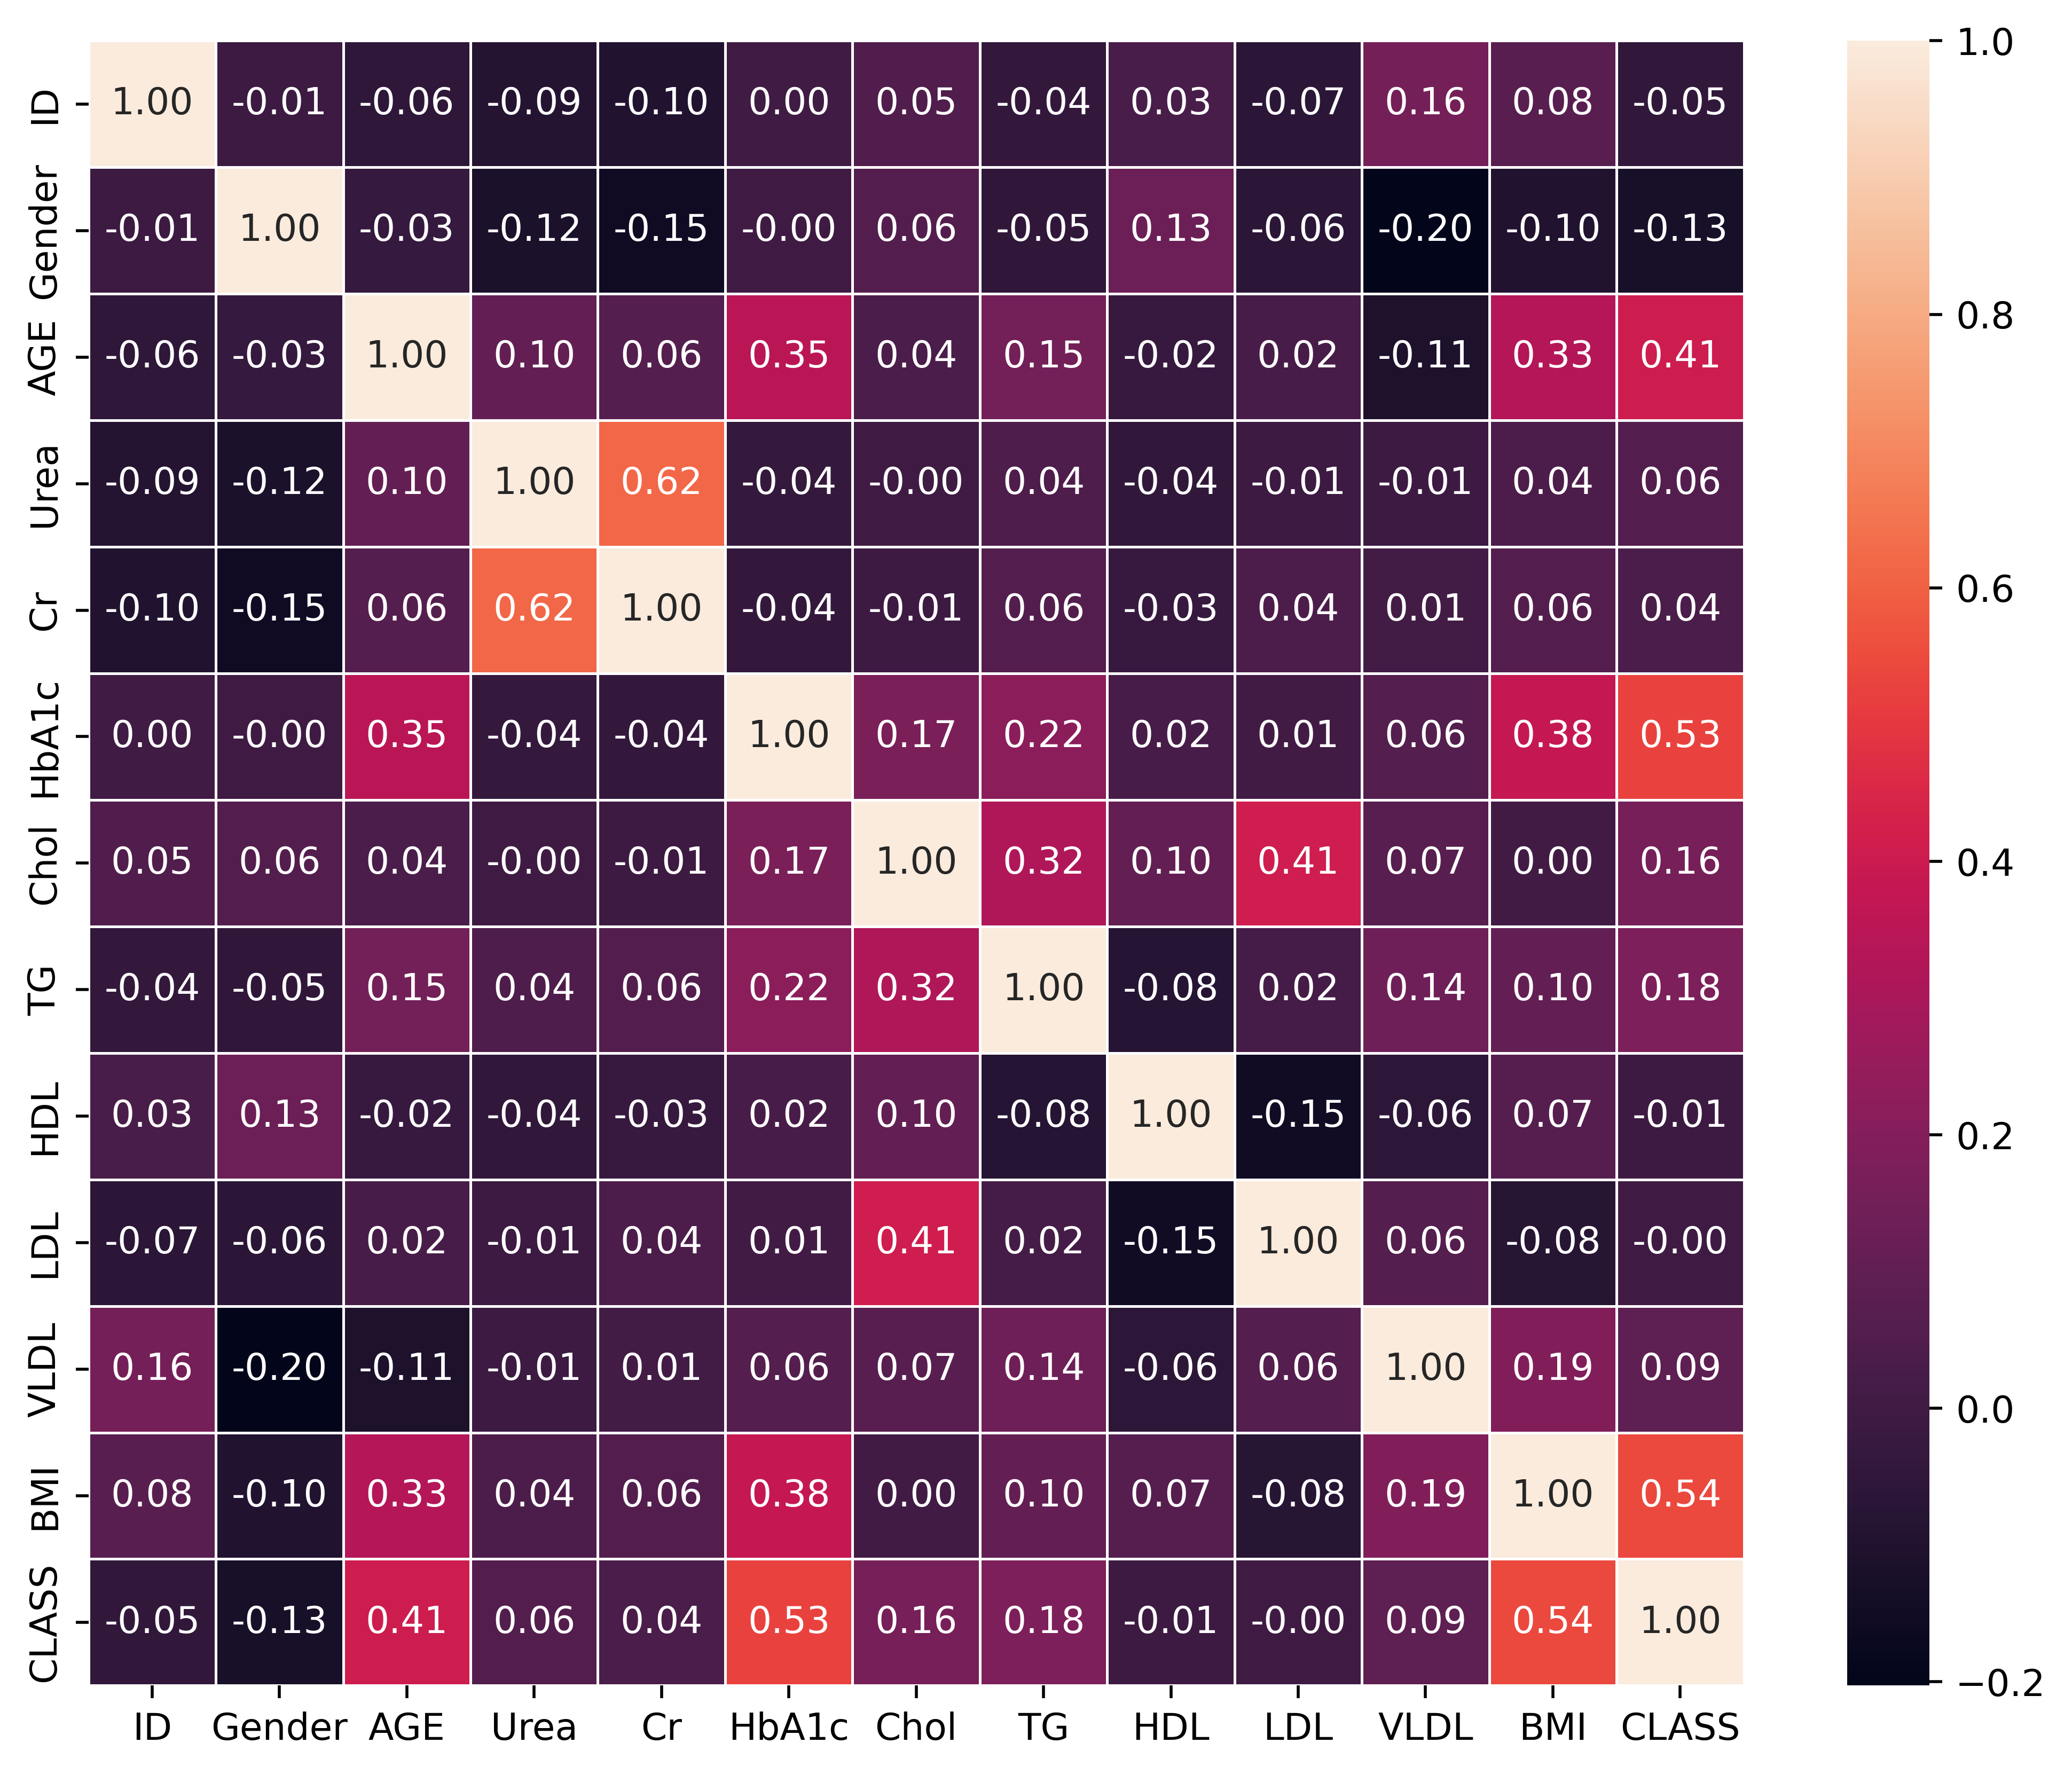

In [244]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

## Logistic regression (Decision Tree Classifier)

In [246]:
Y=df['CLASS']


In [248]:
X= df.drop(['CLASS'],axis=1)

In [250]:
X

,ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,502,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,735,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,420,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,680,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,504,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,671,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,669,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,99,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [252]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [256]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

[Text(0.5714285714285714, 0.9285714285714286, 'x[5] <= 5.6\ngini = 0.187\nsamples = 634\nvalue = [66, 568]'),
 Text(0.42857142857142855, 0.7857142857142857, 'x[11] <= 24.8\ngini = 0.457\nsamples = 102\nvalue = [66, 36]'),
 Text(0.2857142857142857, 0.6428571428571429, 'x[6] <= 4.95\ngini = 0.326\nsamples = 83\nvalue = [66, 17]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 56\nvalue = [56, 0]'),
 Text(0.42857142857142855, 0.5, 'x[10] <= 0.75\ngini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5714285714285714, 0.35714285714285715, 'x[11] <= 20.0\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.42857142857142855, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7142857142857143, 0.21428571428571427, 'x[7] <= 0.9\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.5714285714285714, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Te

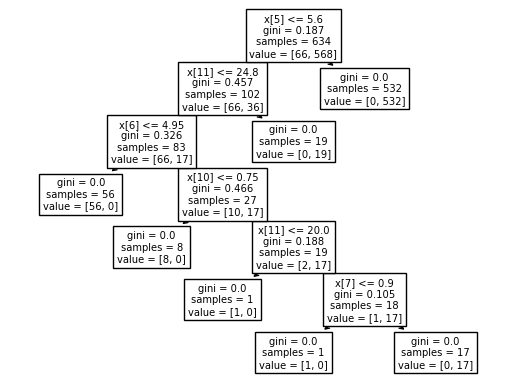

In [258]:
tree.plot_tree(clf)

In [260]:
prediction=clf.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score

In [264]:
accuracy=accuracy_score(Y_test, prediction)

In [266]:
accuracy

0.987220447284345

In [285]:
confusion_matrix(Y_test, prediction)

array([[ 35,   2],
       [  2, 274]])

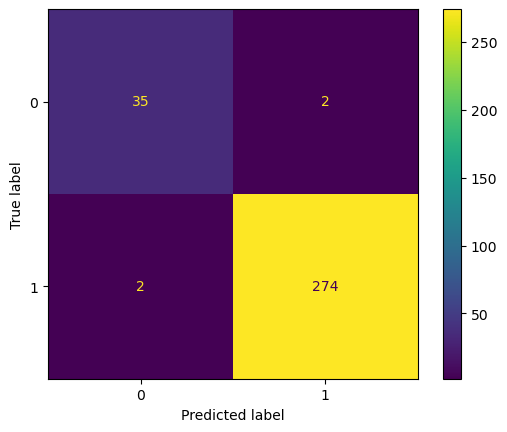

In [287]:
cm = confusion_matrix(Y_test, prediction, labels=clf_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_log.classes_)
disp.plot()

plt.show()

## logistic regression 

In [269]:
from sklearn.linear_model import LogisticRegression

In [271]:
clf_log = LogisticRegression(random_state=0).fit(X_train,Y_train )

/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [273]:
predict_log=clf_log.predict(X_test)

In [275]:
accuracy=accuracy_score(Y_test, predict_log)

In [277]:
accuracy

0.9009584664536742

In [279]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [281]:
confusion_matrix(Y_test, predict_log)

array([[ 13,  24],
       [  7, 269]])

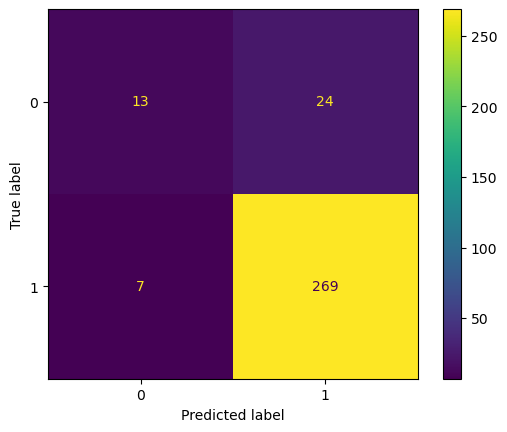

In [283]:
cm = confusion_matrix(Y_test, predict_log, labels=clf_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_log.classes_)
disp.plot()

plt.show()

## Selecting best K-features 